# INTRODUCTION

Predicting commodities value is a fundamental part on the economy on every country because it helps being more productive, also assist on the analysis on bonds and futures. There are a lot of commodities and different kind, so let create a dynamic code to predict every commodity price depending on their characteristics.

# LIBRARIES AND DATA

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("commodity_futures.csv")

df.head()

,Date,NATURAL GAS,GOLD,WTI CRUDE,BRENT CRUDE,SOYBEANS,CORN,COPPER,SILVER,LOW SULPHUR GAS OIL,...,ZINC,ULS DIESEL,NICKEL,WHEAT,SUGAR,GASOLINE,COFFEE,LEAN HOGS,HRW WHEAT,COTTON
0,2000-01-03,NaN,NaN,NaN,NaN,456.50,200.75,NaN,NaN,NaN,...,1237.50,NaN,8446.0,247.50,6.10,NaN,116.50,55.975,274.25,51.07
1,2000-01-04,2.176,283.7,25.55,24.39,464.25,203.00,0.8480,5.375,213.50,...,1215.00,67.78,8314.0,247.25,5.77,NaN,116.25,55.625,274.00,50.73
2,2000-01-05,2.168,282.1,24.91,23.73,469.25,203.00,0.8565,5.210,213.00,...,1209.25,66.55,8307.0,249.75,5.81,NaN,118.60,55.075,276.25,51.56
3,2000-01-06,2.196,282.4,24.78,23.62,468.00,203.75,0.8530,5.167,211.25,...,1212.00,66.28,8252.0,248.50,5.77,NaN,116.85,55.175,275.00,52.08
4,2000-01-07,2.173,282.9,24.22,23.09,471.50,207.00,0.8540,5.195,205.25,...,1209.25,64.75,8174.0,251.75,5.84,NaN,114.15,55.625,277.75,53.96


# ETL

### As we have a lot of data, we are going to drop every Null Value

In [3]:
df.dropna(inplace = True)
df.head()

,Date,NATURAL GAS,GOLD,WTI CRUDE,BRENT CRUDE,SOYBEANS,CORN,COPPER,SILVER,LOW SULPHUR GAS OIL,...,ZINC,ULS DIESEL,NICKEL,WHEAT,SUGAR,GASOLINE,COFFEE,LEAN HOGS,HRW WHEAT,COTTON
1483,2005-10-03,14.017,466.1,65.47,62.80,581.00,208.75,1.7590,7.455,627.75,...,1404.25,208.09,13505.0,348.75,11.53,188.88,92.85,68.225,381.75,52.55
1484,2005-10-04,14.224,466.1,63.90,61.22,562.50,205.75,1.7660,7.425,607.75,...,1415.50,204.97,13205.0,347.25,11.43,184.53,92.70,68.025,379.00,51.55
1485,2005-10-05,14.183,466.1,62.79,60.12,563.50,204.75,1.7865,7.478,614.50,...,1447.75,201.48,13275.0,345.00,11.44,176.50,93.70,68.200,378.00,52.45
1486,2005-10-06,13.375,471.9,61.36,58.37,564.25,204.25,1.7830,7.595,592.75,...,1446.50,195.07,13215.0,345.25,11.26,172.00,93.50,67.675,381.75,52.75
1487,2005-10-07,13.226,474.7,61.84,59.21,564.25,202.50,1.8085,7.770,595.00,...,1468.00,196.01,13141.0,338.00,11.37,174.00,94.85,68.550,376.75,52.20


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4557 entries, 1483 to 6090
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 4557 non-null   object 
 1   NATURAL GAS          4557 non-null   float64
 2   GOLD                 4557 non-null   float64
 3   WTI CRUDE            4557 non-null   float64
 4   BRENT CRUDE          4557 non-null   float64
 5   SOYBEANS             4557 non-null   float64
 6   CORN                 4557 non-null   float64
 7   COPPER               4557 non-null   float64
 8   SILVER               4557 non-null   float64
 9   LOW SULPHUR GAS OIL  4557 non-null   float64
 10  LIVE CATTLE          4557 non-null   float64
 11  SOYBEAN OIL          4557 non-null   float64
 12  ALUMINIUM            4557 non-null   float64
 13  SOYBEAN MEAL         4557 non-null   float64
 14  ZINC                 4557 non-null   float64
 15  ULS DIESEL           4557 non-null 

In [5]:
df.describe()

,NATURAL GAS,GOLD,WTI CRUDE,BRENT CRUDE,SOYBEANS,CORN,COPPER,SILVER,LOW SULPHUR GAS OIL,LIVE CATTLE,...,ZINC,ULS DIESEL,NICKEL,WHEAT,SUGAR,GASOLINE,COFFEE,LEAN HOGS,HRW WHEAT,COTTON
count,4557.000000,4557.000000,4557.000000,4557.000000,4557.000000,4557.000000,4557.000000,4557.000000,4557.000000,4557.00000,...,4557.000000,4557.000000,4557.000000,4557.000000,4557.000000,4557.000000,4557.000000,4557.000000,4557.000000,4557.000000
mean,4.335791,1298.290476,72.065677,77.036743,1108.062706,459.912113,3.149924,19.556896,682.145655,115.69492,...,2440.100239,223.134891,18175.737814,597.740948,16.615872,212.528449,146.357779,75.908465,622.911126,77.565925
std,2.293154,383.101032,22.401068,24.615993,283.307105,148.527850,0.697375,6.706823,221.799119,22.35165,...,650.261503,70.450696,7636.577007,163.661620,5.010791,63.611147,43.862348,16.857118,184.543823,25.376722
min,1.482000,457.900000,-37.630000,19.330000,527.250000,186.250000,1.247500,7.425000,190.750000,73.85000,...,1047.000000,61.040000,7562.000000,293.000000,8.450000,41.180000,86.650000,37.325000,347.500000,39.140000
25%,2.764000,1096.400000,54.010000,58.470000,903.500000,359.000000,2.660500,15.101000,526.000000,96.07500,...,1966.250000,172.030000,12798.500000,479.500000,12.590000,161.340000,115.150000,63.075000,472.750000,62.290000
50%,3.660000,1284.400000,70.080000,72.620000,1028.000000,390.250000,3.144500,17.567000,627.000000,116.15000,...,2311.750000,204.950000,16493.000000,550.750000,15.830000,205.680000,132.350000,73.550000,569.250000,72.190000
75%,5.006000,1620.500000,90.730000,100.310000,1363.500000,586.500000,3.611500,23.264000,885.750000,127.85000,...,2850.750000,287.480000,21527.000000,698.000000,19.380000,264.580000,169.700000,86.425000,751.750000,84.950000
max,15.378000,2055.700000,145.290000,146.080000,1771.000000,831.250000,4.929000,48.584000,1522.500000,181.32500,...,4594.000000,513.540000,53750.000000,1425.250000,35.310000,427.620000,304.900000,133.875000,1367.750000,215.150000


# EDA

### Plotting the price of the Narural Gas (Energy)

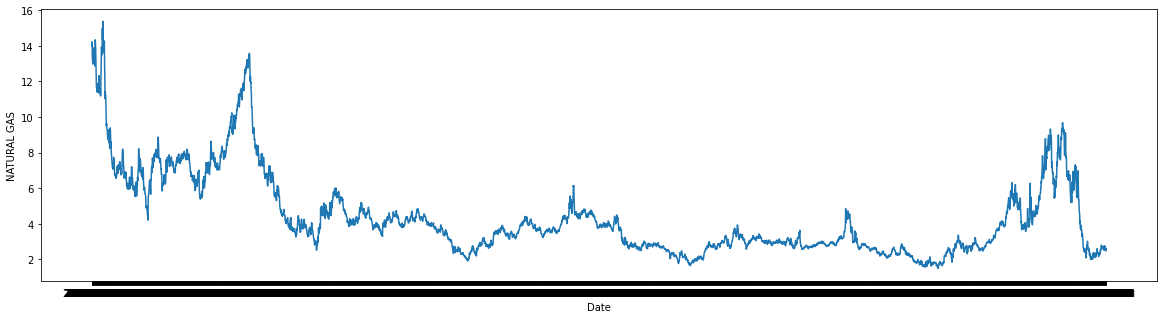

In [6]:
plt.figure(figsize = (20,5))
sns.lineplot(x=df["Date"], y =df["NATURAL GAS"])
plt.show()

### Plotting the price of the Coffee (Food)

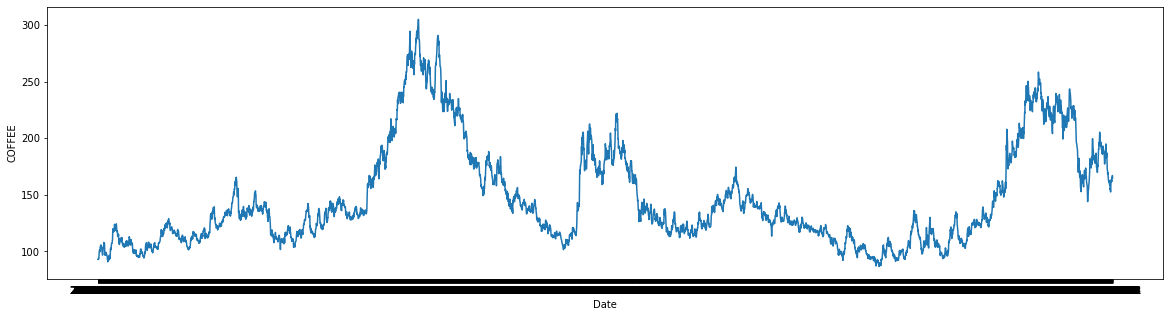

In [7]:
plt.figure(figsize = (20,5))
sns.lineplot(x=df["Date"], y =df['COFFEE'])
plt.show()

### Plotting the price of the Gold (Metal)

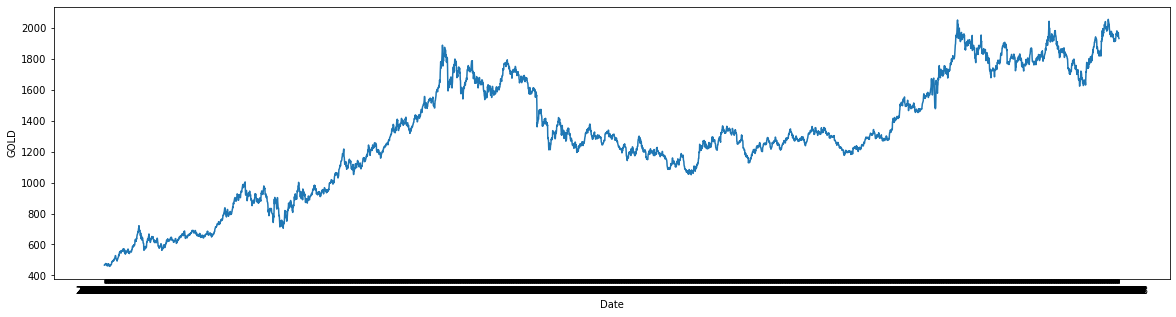

In [8]:
plt.figure(figsize = (20,5))
sns.lineplot(x=df["Date"], y =df["GOLD"])
plt.show()

### Plotting the correlation heatmap of commodities by category

In [9]:
df.columns

Index(['Date', 'NATURAL GAS', 'GOLD', 'WTI CRUDE', 'BRENT CRUDE', 'SOYBEANS',
       'CORN', 'COPPER', 'SILVER', 'LOW SULPHUR GAS OIL', 'LIVE CATTLE',
       'SOYBEAN OIL', 'ALUMINIUM', 'SOYBEAN MEAL', 'ZINC', 'ULS DIESEL',
       'NICKEL', 'WHEAT', 'SUGAR', 'GASOLINE', 'COFFEE', 'LEAN HOGS',
       'HRW WHEAT', 'COTTON'],
      dtype='object')

### By Energy

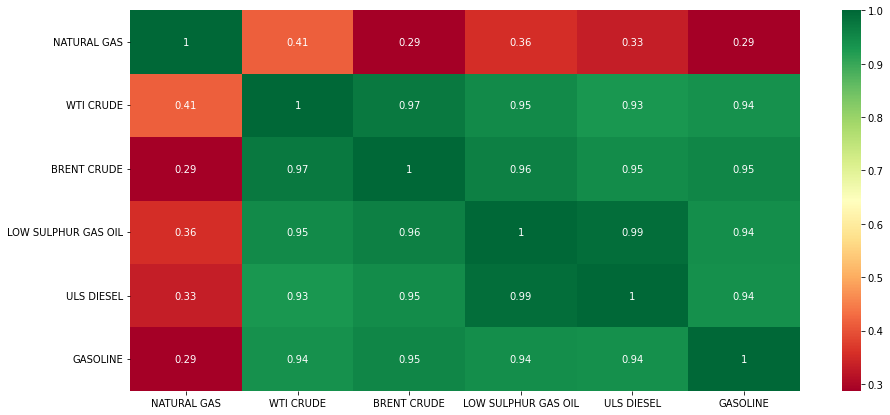

In [10]:
energy = df[['NATURAL GAS', 'WTI CRUDE', 'BRENT CRUDE', 'LOW SULPHUR GAS OIL', 'ULS DIESEL',  'GASOLINE']]

energyCorr = energy.corr()

plt.figure(figsize=(15,7))
sns.heatmap(energyCorr, annot = True, cmap = 'RdYlGn')
plt.show()

### By Metal

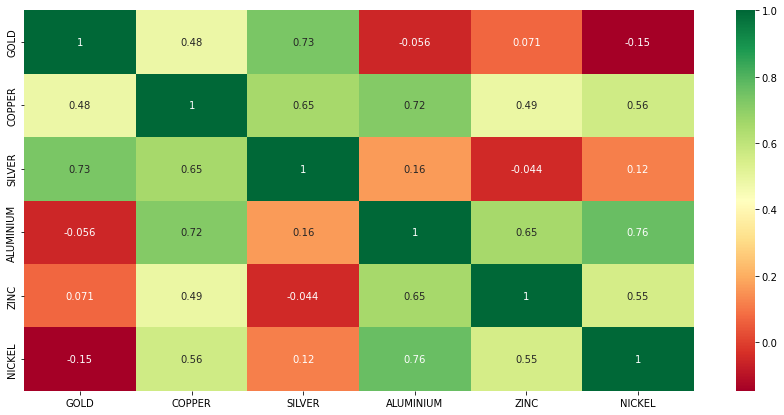

In [11]:
metals = df[['GOLD','COPPER', 'SILVER','ALUMINIUM','ZINC','NICKEL']]

metalsCorr = metals.corr()

plt.figure(figsize=(15,7))
sns.heatmap(metalsCorr, annot = True, cmap = 'RdYlGn')
plt.show()

### By Food

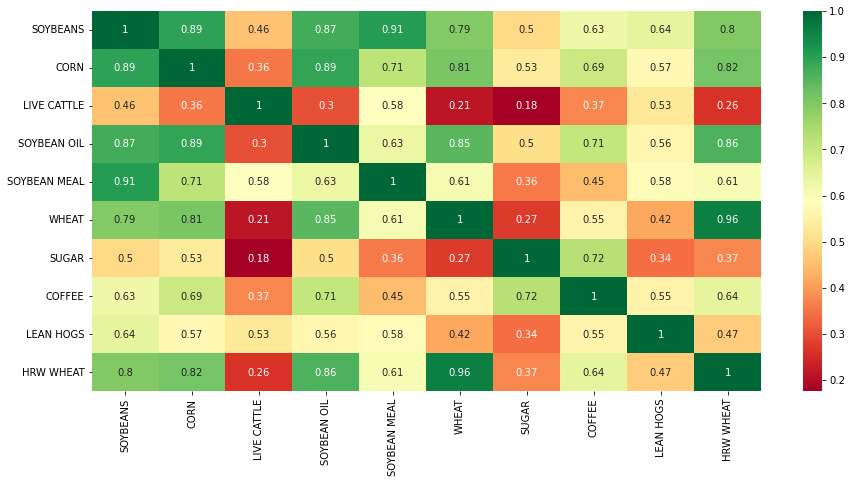

In [12]:
food = df[['SOYBEANS','CORN', 'LIVE CATTLE', 'SOYBEAN OIL','SOYBEAN MEAL',
           'WHEAT', 'SUGAR','COFFEE', 'LEAN HOGS','HRW WHEAT']]

foodCorr = food.corr()

plt.figure(figsize=(15,7))
sns.heatmap(foodCorr, annot = True, cmap = 'RdYlGn')
plt.show()

# MACHINE LEARNING

### Importing all necessary libraries

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error

### Spitting the dataset, training, predictions and performance by number and visual system

Which category of commodities would you like to predict? ENERGY/METALS/FOOD OR EXITMETALS
Index(['GOLD', 'COPPER', 'SILVER', 'ALUMINIUM', 'ZINC', 'NICKEL'], dtype='object')
Which product would you like to predict? SILVER
RMSE:  3.3860438045118677
Variance Score:  75.9 %


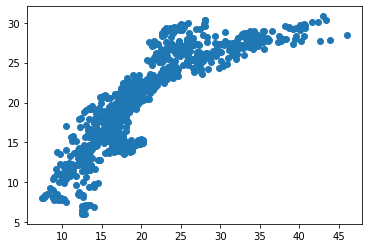

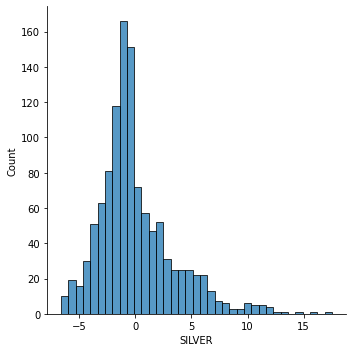

KeyboardInterrupt: Interrupted by user

In [14]:
while True:
    category = input("Which category of commodities would you like to predict? ENERGY/METALS/FOOD OR EXIT")
    if category == "ENERGY":
        
        print(energy.columns)
        predicted_product = input("Which product would you like to predict? ")
        
        X_list = []
        for column in energy:
            if column == predicted_product:
                X_list.append(column)
        

        X = energy.drop(X_list, axis = 1)
        y = energy[predicted_product]
        
        X_train, X_test, y_train, y_test = train_test_split( X,y, test_size=0.25, random_state=123)
        
        lm = LinearRegression().fit(X_train,y_train)
        lm_pred = lm.predict(X_test)
        
        
        
        print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, lm_pred)))
        print("Variance Score: ", round(100*(metrics.explained_variance_score(y_test, lm_pred)),2),"%")
        
        plt.scatter(y_test, lm_pred)
        sns.displot((y_test-lm_pred))
        plt.show()
    
    elif category == "METALS":
        
        print(metals.columns)
        predicted_product = input("Which product would you like to predict? ")
        
        X_list = []
        for column in metals:
            if column == predicted_product:
                X_list.append(column)
        

        X = metals.drop(X_list, axis = 1)
        y = metals[predicted_product]
        
        X_train, X_test, y_train, y_test = train_test_split( X,y, test_size=0.25, random_state=123)
        
        lm = LinearRegression().fit(X_train,y_train)
        lm_pred = lm.predict(X_test)
        
        
        
        print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, lm_pred)))
        print("Variance Score: ", round(100*(metrics.explained_variance_score(y_test, lm_pred)),2),"%")
        
        plt.scatter(y_test, lm_pred)
        sns.displot((y_test-lm_pred))
        plt.show()
    
    elif category == "FOOD":
        
        print(food.columns)
        predicted_product = input("Which product would you like to predict? ")
        
        X_list = []
        for column in food:
            if column == predicted_product:
                X_list.append(column)
        

        X = food.drop(X_list, axis = 1)
        y = food[predicted_product]
        
        X_train, X_test, y_train, y_test = train_test_split( X,y, test_size=0.25, random_state=123)
        
        lm = LinearRegression().fit(X_train,y_train)
        lm_pred = lm.predict(X_test)
        
        
        
        print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, lm_pred)))
        print("Variance Score: ", round(100*(metrics.explained_variance_score(y_test, lm_pred)),2),"%")
        
        plt.scatter(y_test, lm_pred)
        sns.displot((y_test-lm_pred))
        plt.show()
        
    elif category == "EXIT":
        break
    else:
        print("Wrong value, please try again with this options: energy/metals/food")
        